In [1]:
# %pip install xarray matplotlib numpy scipy pandas

In [5]:
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
from scipy.fft import fft, fftfreq
import pandas as pd

**Analysis Goals**

Frequency analysis of time series data is a crucial step in understanding the underlying patterns within signals, such as those obtained from EEG or LFP measurements. Signals are primarily characterized by their amplitude, which represents the signal's strength, and frequency, indicating how often a pattern repeats within a given time frame.

When we measure signals like EEG or LFP, we often capture a combination of multiple underlying signals, and this amalgamation modifies the overall shape of the measured signal. To gain insights into the signal's nature, it's essential to identify the frequencies at which the signal exhibits activity.

The initial step in this process is to visualize the data in the frequency domain. By doing so, we can observe peaks forming at specific frequencies, indicating the presence of distinct activities within the signal. This step is crucial in identifying the constituent frequencies within the data.

In this notebook, we won't delve into the mathematical intricacies of the transformation itself. Instead, we will focus on practical methods for extracting meaningful frequency information from various types of signals. We'll start by examining pure sine waves, which are periodic signals with easily recognizable frequencies. By studying these sine waves, we can develop an understanding of how to determine frequency solely by observing the signal's characteristics.

Subsequently, we will explore composite signals created by combining multiple sine waves, making it more challenging to discern their constituent frequencies. Finally, we will demonstrate how to transform time-domain signals into the frequency domain using Python. With the generated plots, we will work to identify the constituent frequencies, allowing us to uncover and analyze the frequencies present in the dataset under investigation. This analytical approach is a fundamental step in uncovering valuable insights from time series data.

**Learning Goals**

We will learn 
- Transforming time domain to frequency domain with scipy.fft
- Pandas to identify dominant frequency
- How to use python function created by other users 

**Run the two cells below prior to starting the exercises**

In [1]:
# Download the data

from pathlib import Path
import requests
from tqdm import tqdm

def download_from_sciebo(public_url, to_filename, is_file=True):
    """
    Downloads a file or folder from a shared URL on Sciebo.
    """
    # Create the folder if a longer path was described
    path = Path(to_filename)
    if len(path.parts) > 1:
        Path(to_filename).parent.mkdir(parents=True, exist_ok=True)

    r = requests.get(public_url + "/download", stream=True)

    if 'Content-Length' in r.headers and is_file:
        total_size = int(r.headers['Content-Length'])
        progress_bar = tqdm(desc=f"Downloading {to_filename}", unit='B', unit_scale=True, total=total_size)
    else:
        progress_bar = None

    with open(to_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
            if progress_bar:
                progress_bar.update(len(chunk))

    if progress_bar:
        progress_bar.close()

download_from_sciebo('https://uni-bonn.sciebo.de/s/bOiGXODN8Cbax34', 'data/steinmetz_2017-12-06_Lederberg.nc')

In [3]:
# create periodic signal and compute power spectrum
# create_periodic_signal will create a sine wave with given amplitude and frequency
# compute_power_spectrum will transform the time series data into frequency domain

def create_periodic_signal(times, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * times)

def compute_power_spectrum(t, signal_values):
    fft_result = fft(signal_values)
    fft_freqs = fftfreq(len(signal_values), d=(t[1] - t[0]))
    positive_freqs = fft_freqs[fft_freqs > 0]
    positive_fft_result = 2.0/len(signal_values) * np.abs(fft_result[fft_freqs > 0])

    return positive_freqs, positive_fft_result


## Create periodic signals and composite signals

**Analysis Goals**
In this section, we will learn about 
- periodic signals and how they vary with amplitude and frequency
- composite signals and what they could be composed of

**Learning Goals**
We will make use of matplotlib and how powerful it is in customizing plots


| Code | Description |
| ---- | ----------- |
| `np.linspace(start, stop, n_points)` | Create `n_points` equally spaced values between `start` and `stop`. |
| `plt.plot(x, y)` | Plot `x` on the x-axis and `y` on the y-axis. |
| `plt.xlabel('X-axis')` | Set the x-axis label as 'X-axis'. |
| `plt.ylabel('Y-axis')` | Set the y-axis label as 'Y-axis'. |
| `np.random.randn(n_points)` | Generate `n_points` random values drawn from a standard normal distribution. |

**Example** create a periodic signal with 1.0 V amplitude and 1.0 Hz frequency measured 100 times between times 0 and 1 

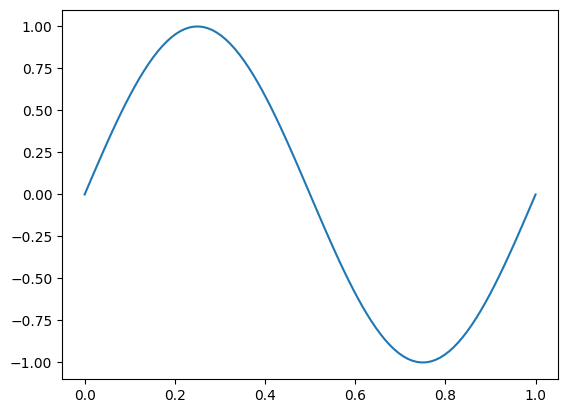

In [5]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times at which the signal was measured
y = create_periodic_signal(times=t, amplitude=1.0, frequency=1.0)
plt.plot(t, y)

Amplitude here is the maximum height of the signal which is 1V. The entire patter of sine wave is the one in this plot. If the frequency is `n` Hz, you will see this pattern repeat `n` times in a second. It can also be a fraction. In that case, you will see fraction of this signal in a second

Create a periodic signal with 1.0 V amplitude and 0.5 Hz frequency measured 100 times between times 0 and 1. What do you notice?

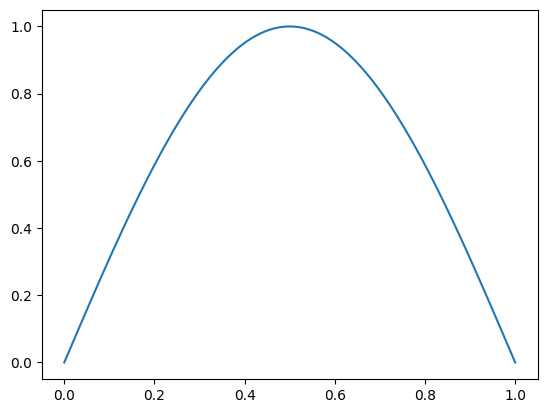

In [6]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times
y = create_periodic_signal(times=t, amplitude=1.0, frequency=0.5)
plt.plot(t, y)

Create a periodic signal with 1.0 V amplitude and 2.0 Hz frequency measured 100 times between times 0 and 1. 

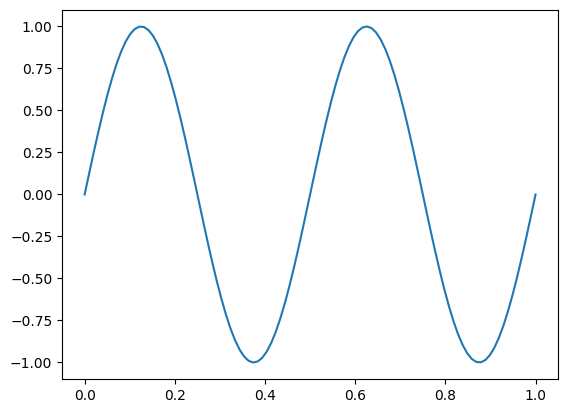

In [7]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times
y = create_periodic_signal(times=t, amplitude=1.0, frequency=2.0)
plt.plot(t, y)

Create a periodic signal with 1.0 V amplitude and 10.0 Hz frequency measured 100 times between times 0 and 1 and add x and y axis labels. 

Text(0, 0.5, 'Signal [V]')

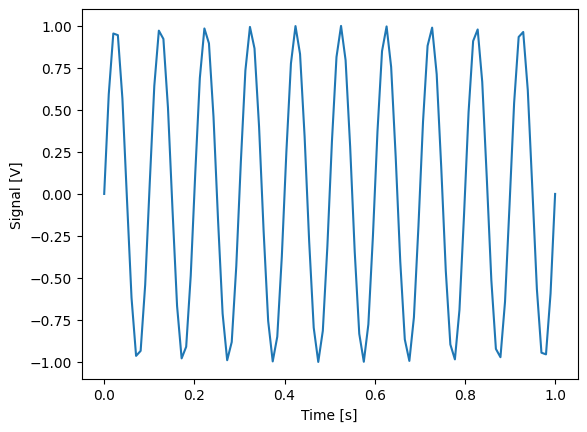

In [8]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times
y = create_periodic_signal(times=t, amplitude=1.0, frequency=10.0)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')

It is much easier to compare these three signals if we can plot them together. 

**Example** Create three signals measured 100 times between times 0 and 1 and plot them together

y1: Amplitude of 1 V, Frequency of 1 Hz </br>
y2: Amplitude of 1 V, Frequency of 0.5 Hz </br>
y3: Amplitude of 1 V, Frequency of 2 Hz </br>

Text(0, 0.5, 'Signal [V]')

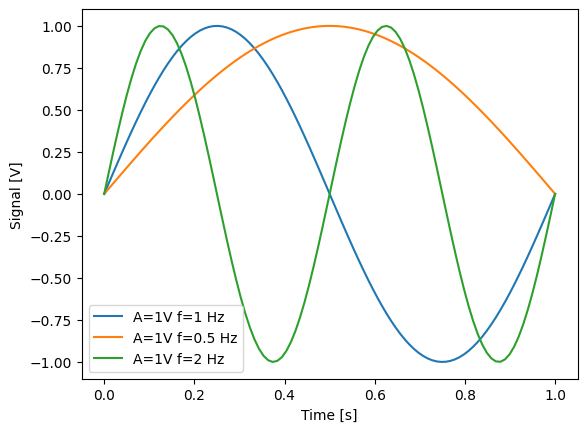

In [9]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

plt.plot(t, create_periodic_signal(times=t, amplitude=1.0, frequency=1.0), label='A=1V f=1 Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=1.0, frequency=0.5), label='A=1V f=0.5 Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=1.0, frequency=2.0), label='A=1V f=2 Hz')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')

Create three signals measured 100 times between times 0 and 1 and plot them together

y1: Amplitude of 0.1 V, Frequency of 1 Hz </br>
y2: Amplitude of 1 V, Frequency of 1 Hz </br>
y3: Amplitude of 10 V, Frequency of 1 Hz </br>

How does this differ from the previous plot?

Text(0, 0.5, 'Signal [V]')

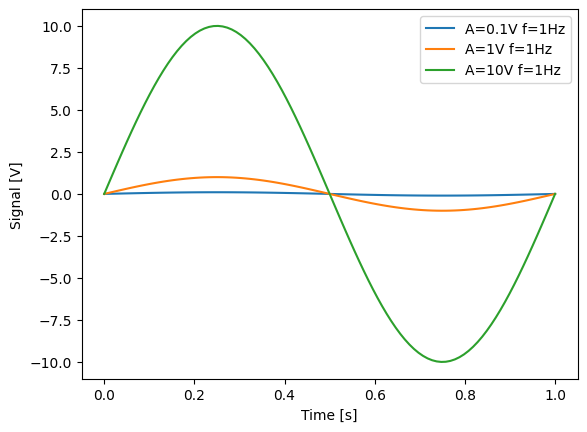

In [10]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

plt.plot(t, create_periodic_signal(times=t, amplitude=0.1, frequency=1.0), label='A=0.1V f=1Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=1.0, frequency=1.0), label='A=1V f=1Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=10.0, frequency=1.0), label='A=10V f=1Hz')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')

Create three signals measured 100 times between times 0 and 1 and plot them together

y1: Amplitude of 0.1 V, Frequency of 1 Hz </br>
y2: Amplitude of 1 V, Frequency of 0.5 Hz </br>
y3: Amplitude of 10 V, Frequency of 2 Hz </br>

Compare this plot with earlier plots

Text(0, 0.5, 'Signal [V]')

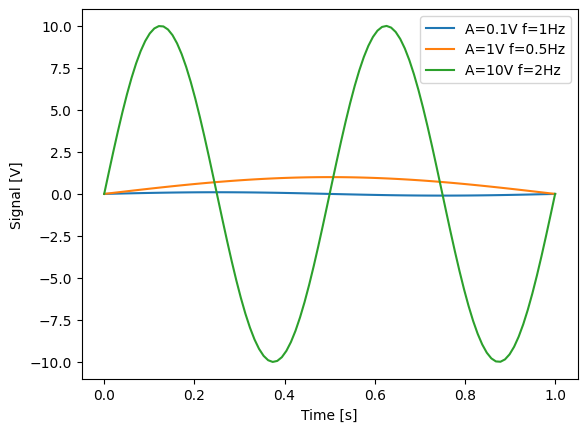

In [11]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

plt.plot(t, create_periodic_signal(times=t, amplitude=0.1, frequency=1.0), label='A=0.1V f=1Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=1.0, frequency=0.5), label='A=1V f=0.5Hz')
plt.plot(t, create_periodic_signal(times=t, amplitude=10.0, frequency=2.0), label='A=10V f=2Hz')

plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Signal [V]')

**Example** Combine three signals of amplitudes 1 V and frequencies 1 Hz measured 100 times between 0 and 1 second. What do you notice?

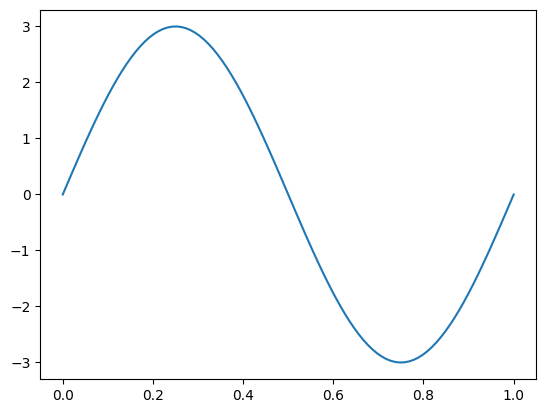

In [12]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=1.0, frequency=1.0)
y2 = create_periodic_signal(times=t, amplitude=1.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=1.0, frequency=1.0)

y = y1 + y2 + y3

plt.plot(t, y)

Amplitudes of the combined signal is 3 times the amplitude of the single signal (which has same amplitude). Amplitudes just get added together

Combine three signals of measured 100 times between 0 and 1 second

y1: amplitude 1 V, frequency 0.5 Hz </br>
y2: amplitude 1 V, frequency 1.0 Hz </br>
y3: amplitude 1 V, frequency 2.0 Hz </br>


What happened here?

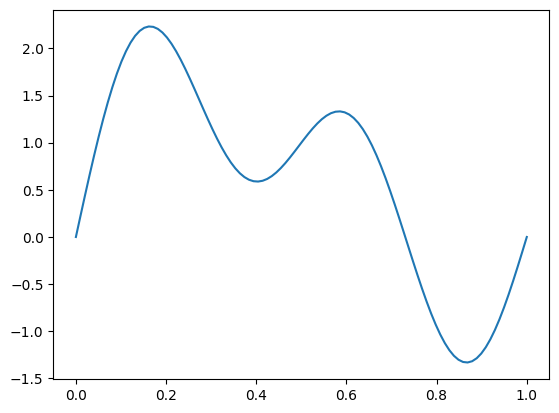

In [13]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=1.0, frequency=0.5)
y2 = create_periodic_signal(times=t, amplitude=1.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=1.0, frequency=2.0)

y = y1 + y2 + y3

plt.plot(t, y)

Combine three signals of measured 100 times between 0 and 1 second

y1: amplitude 0.1 V, frequency 0.5 Hz </br>
y2: amplitude 2 V, frequency 1.0 Hz </br>
y3: amplitude 1.0 V, frequency 2.0 Hz </br>

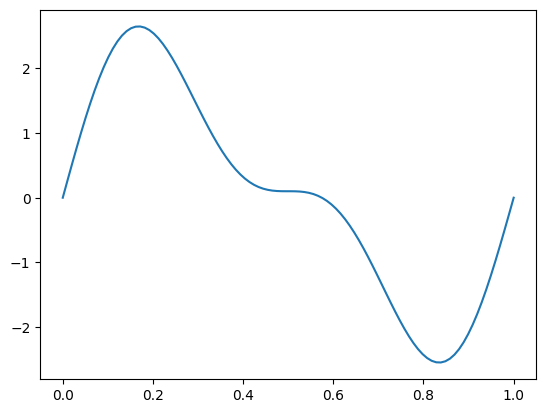

In [14]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=0.1, frequency=0.5)
y2 = create_periodic_signal(times=t, amplitude=2.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=1.0, frequency=2.0)

y = y1 + y2 + y3

plt.plot(t, y)

Real world signals aren't usually this clean. There is always noise that comes from various sources. 

**Example** Combine three signals of measured 100 times between 0 and 1 second and noise with amplitude of 0.1 V

y1: amplitude 0.1 V, frequency 0.5 Hz </br>
y2: amplitude 2 V, frequency 1.0 Hz </br>
y3: amplitude 1.0 V, frequency 2.0 Hz </br>

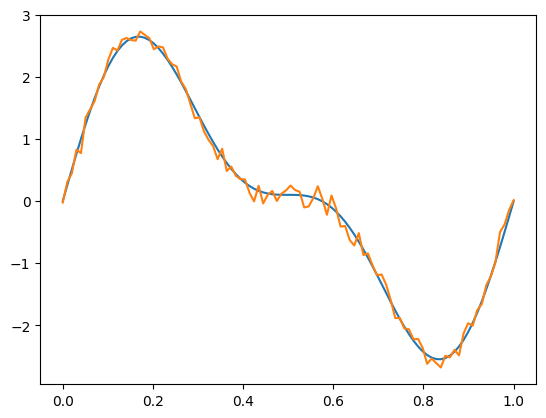

In [15]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=0.1, frequency=0.5)
y2 = create_periodic_signal(times=t, amplitude=2.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=1.0, frequency=2.0)

noise_amplitude = 0.1  
noise = noise_amplitude * np.random.randn(len(t))

y = y1 + y2 + y3 + noise

plt.plot(t, y1+y2+y3)
plt.plot(t, y)

Combine three signals of measured 100 times between 0 and 1 second and noise with amplitude of 1.0 V

y1: amplitude 0.1 V, frequency 0.5 Hz </br>
y2: amplitude 2 V, frequency 1.0 Hz </br>
y3: amplitude 1.0 V, frequency 2.0 Hz </br>

How does this compare when amplitude of noise increases here?

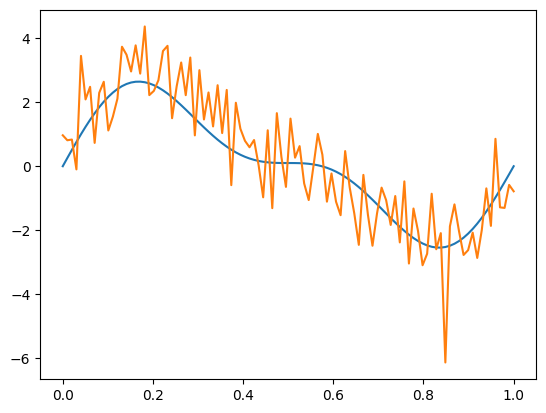

In [16]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=0.1, frequency=0.5)
y2 = create_periodic_signal(times=t, amplitude=2.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=1.0, frequency=2.0)

noise_amplitude = 1.0  
noise = noise_amplitude * np.random.randn(len(t))

y = y1 + y2 + y3 + noise

plt.plot(t, y1+y2+y3)
plt.plot(t, y)

Combine three signals of measured 100 times between 0 and 1 second and noise with amplitude of 1.0 V

y1: amplitude 0.5 V, frequency 0.5 Hz </br>
y2: amplitude 10 V, frequency 1.0 Hz </br>
y3: amplitude 5.0 V, frequency 2.0 Hz </br>

How does this compare when amplitude of signal is higher?

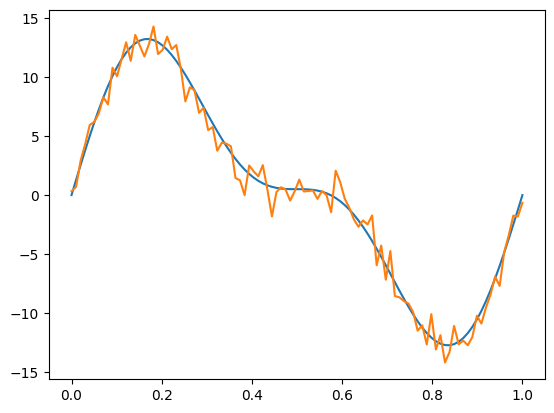

In [17]:
t = np.linspace(0, 1, 100) # create 100 equally spaced points between 0 and 1 representing times

y1 = create_periodic_signal(times=t, amplitude=0.5, frequency=0.5)
y2 = create_periodic_signal(times=t, amplitude=10.0, frequency=1.0)
y3 = create_periodic_signal(times=t, amplitude=5.0, frequency=2.0)

noise_amplitude = 1.0  
noise = noise_amplitude * np.random.randn(len(t))

y = y1 + y2 + y3 + noise

plt.plot(t, y1+y2+y3)
plt.plot(t, y)

---

## Frequency Analysis

**Analysis Goals**

In this section, we will learn
- how to do identify frequency of oscillation of a signals
- how to identify frequencies of oscillation of a composite signal

Most of the signals we observe or measure is a composite signal composed of more than frequency. Frequency analysis is an important tool in breaking down a composite signal into its constituent frequencies. The way to do frequency analysis of a time series data (in this case, a signal measured over a period of time) is by first transforming it into frequency space which can be done in four steps. 
1. Perform a Fourier Transform on the signal 
2. Calculate the frequencies corresponding to the FFT result 
3. Since the FFT result is symmetric, filter out the negative frequencies. 
4. Calculate the magnitude of the FFT result for positive frequencies and scale the result by a factor of 2.0/len(alpha). 

**Learning Goals**

- `scipy.fft` and `scipy.fftfreq` for frequency analysis
- Pandas sort_values() to identify frequency of oscillation


Here's a markdown table with explanations for the provided code snippets:

| Code                                    | Description                                            |
| --------------------------------------- | ------------------------------------------------------ |
| `fft(some_signal)`                     | Step 1: Compute the Fast Fourier Transform of `some_signal`. This transforms the signal from the time domain to the frequency domain. |
| `fftfreq(len(some_signal), d=sampling_time)` | Step 2: Calculate the frequencies corresponding to the FFT result. `len(some_signal)` is the number of data points, and `sampling_time` is the time interval between samples. |
| `fft_freqs[fft_freqs > 0]`             | Step 3: Select only the positive frequencies from the `fft_freqs` array. This step filters out the negative frequencies. |
| `2.0/len(some_signal) * np.abs(fft_result[fft_freqs > 0])` | Step 4: Calculate the magnitude of the FFT result for positive frequencies. The factor `2.0/len(some_signal)` scales the result appropriately. |
| `pd.DataFrame({'x': list_of_x_values, 'y': list_of_y_values})` | Create a Pandas DataFrame with 'x' and 'y' columns filled with values. |
| `df.sort_values(by='column1', ascending=False)` | Sort the DataFrame `df` in descending order of `column1`. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `plt.axvline(value)` | Plot a vertical line at the specified 'value' on the x-axis of the plot. |


**Example** Create signal `alpha` with amplitude 110.0 V and frequency 10.5 Hz measured 250 times between 0.01 s and 2.5 s and create amplitude spectrum

Text(0, 0.5, 'Amplitude')

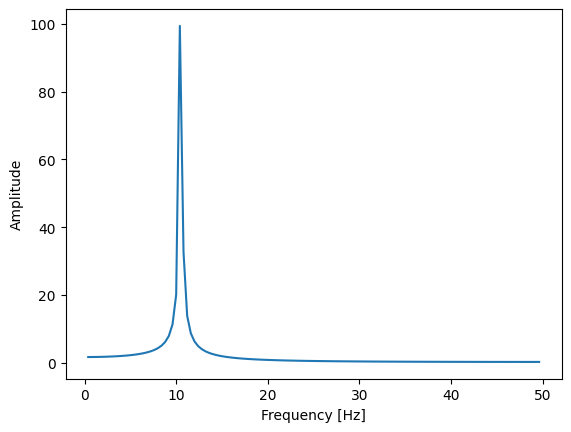

In [18]:
t = np.linspace(0.01, 2.5, 250)
alpha = create_periodic_signal(times=t, amplitude=110., frequency=10.5)

fft_result = fft(alpha)
fft_freqs = fftfreq(len(alpha), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(alpha) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

You can see a peak at around 10 Hz which represents the frequency of the signal we created

Create signal `beta` with amplitude 22.5 V and frequency 7.5 Hz measured 250 times between 0.01 s and 2.5 s and create amplitude spectrum. What do you notice in this and how does this compare with the `alpha` signal?

Text(0, 0.5, 'Amplitude')

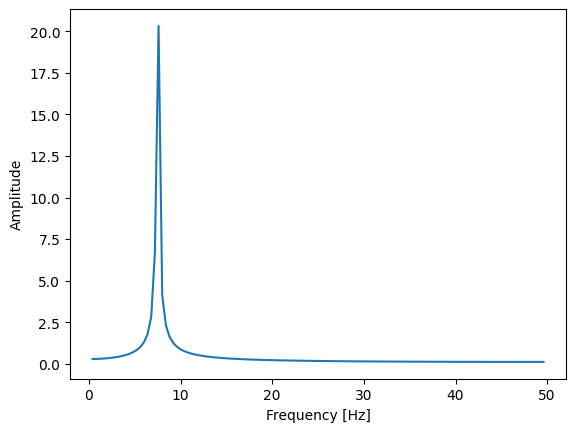

In [19]:
t = np.linspace(0.01, 2.5, 250)
beta = create_periodic_signal(times=t, amplitude=22.5, frequency=7.5)

fft_result = fft(beta)
fft_freqs = fftfreq(len(beta), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(beta) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Create signal `gamma` with amplitude 65.0 V and frequency 5.5 Hz measured 250 times between 0.01 s and 2.5 s and create amplitude spectrum. Is this right based on what you know about the `gamma` signal you created?

Text(0, 0.5, 'Amplitude')

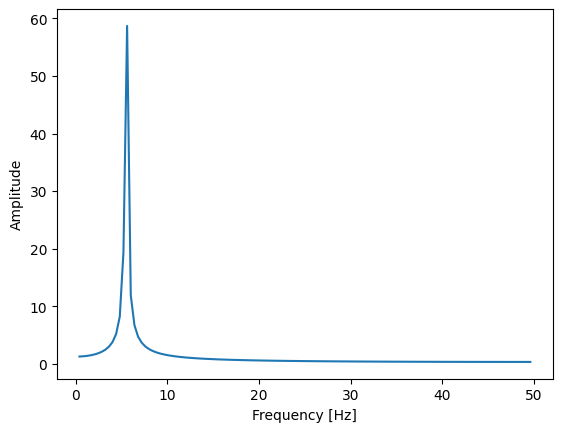

In [20]:
t = np.linspace(0.01, 2.5, 250)
gamma = create_periodic_signal(times=t, amplitude=65.0, frequency=5.5)

fft_result = fft(gamma)
fft_freqs = fftfreq(len(gamma), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(gamma) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Create signal `delta` with amplitude 110.0 V and frequency 2.75 Hz measured 250 times between 0.01 s and 2.5 s and create amplitude spectrum. What do you notice in this and how does this compare with the `alpha` and `beta` signals?

Text(0, 0.5, 'Amplitude')

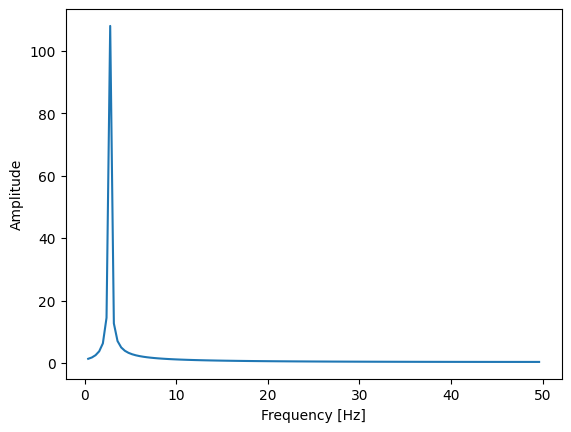

In [21]:
t = np.linspace(0.01, 2.5, 250)
delta = create_periodic_signal(times=t, amplitude=110.0, frequency=2.75)

fft_result = fft(delta)
fft_freqs = fftfreq(len(delta), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(delta) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Create a composite signal `signal = alpha + beta + gamma + delta` and compute amplitude spectrum. What do you notice in this?

Text(0, 0.5, 'Amplitude')

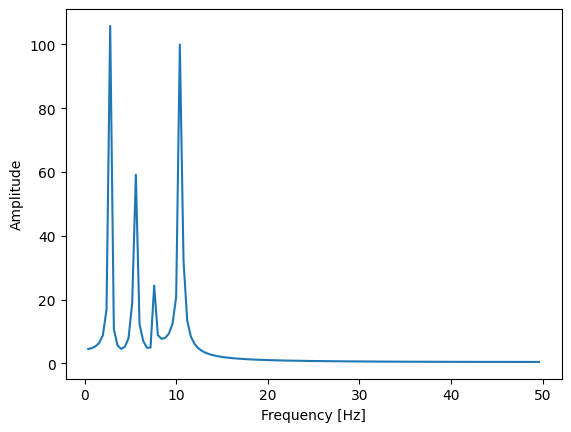

In [22]:
signal = alpha + beta + gamma + delta

fft_result = fft(signal)
fft_freqs = fftfreq(len(signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(signal) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

**Example** Add a noise with amplitude 1.0 V to the signal and plot amplitude spectrum

Text(0, 0.5, 'Amplitude')

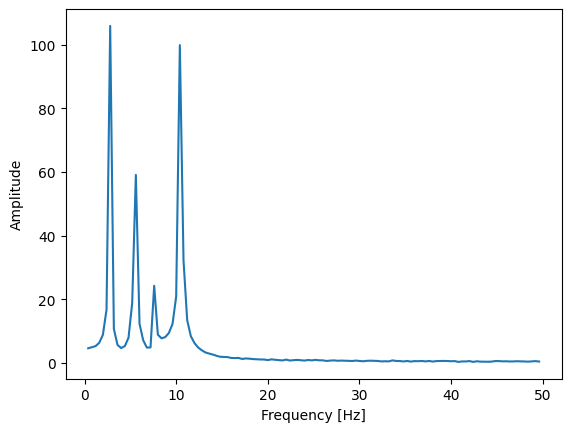

In [23]:
signal = alpha + beta + gamma + delta 
noise_amplitude = 1.0  
noise = noise_amplitude * np.random.randn(len(signal))
signal = signal + noise

fft_result = fft(signal)
fft_freqs = fftfreq(len(signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(signal) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Add a noise with amplitude 10.0 V to the signal and plot amplitude spectrum

Text(0, 0.5, 'Amplitude')

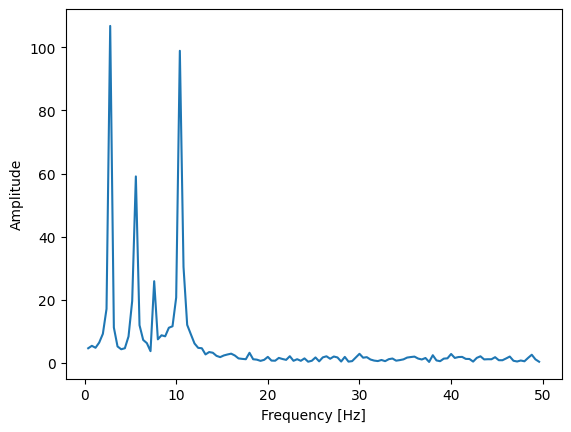

In [24]:
signal = alpha + beta + gamma + delta 
noise_amplitude = 10.0  
noise = noise_amplitude * np.random.randn(len(signal))
signal = signal + noise

fft_result = fft(signal)
fft_freqs = fftfreq(len(signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(signal) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Add a noise with amplitude 100.0 V to the signal and plot amplitude spectrum. What did this exercise tell you?

Text(0, 0.5, 'Amplitude')

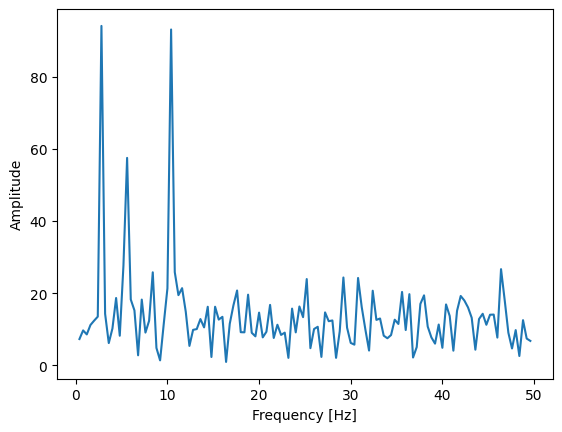

In [25]:
signal = alpha + beta + gamma + delta 
noise_amplitude = 100.0  
noise = noise_amplitude * np.random.randn(len(signal))
signal = signal + noise

fft_result = fft(signal)
fft_freqs = fftfreq(len(signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(signal) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

Plotting power instead of amplitude can help with reducing seeing noise in the spectrum making it easier to identify frequencies. Plot the same as before but with power instead of amplitude

Hint: power is nothing but positive_fft_result**2

Text(0, 0.5, 'Power')

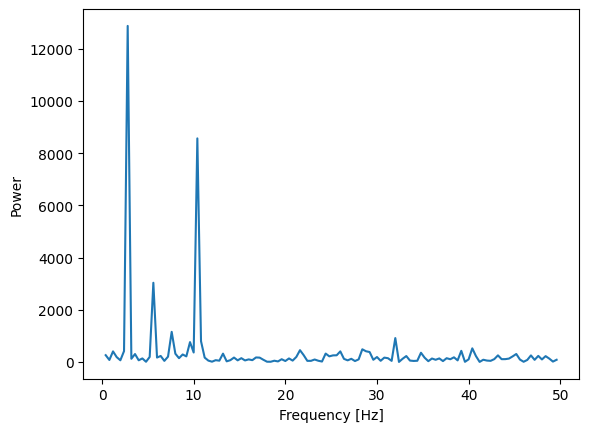

In [26]:
signal = alpha + beta + gamma + delta 
noise_amplitude = 100.0  
noise = noise_amplitude * np.random.randn(len(signal))
signal = signal + noise

fft_result = fft(signal)
fft_freqs = fftfreq(len(signal), d=(t[1] - t[0]))
positive_freqs = fft_freqs[fft_freqs > 0]
positive_fft_result = 2.0/len(signal) * np.abs(fft_result[fft_freqs > 0])

plt.plot(positive_freqs, positive_fft_result**2)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

**Example** Use Pandas to identify frequency of maximum oscillation of `alpha` signal. 

(We will also use create_power_spectrum() custom function to simplify the process of computing power spectrum )

```python
df.sort_values(         # sort the dataframe            
    by='power',         # by the column power
    ascending=False     # in descending order
    ).head(1)           # and display only the first as that is the highest power
```

In [27]:
freq, power = compute_power_spectrum(t, alpha)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

df.sort_values(by='power', ascending=False).head(1)

,frequency,power
25,10.4,99.348168


Use Pandas to identify frequency of maximum oscillation of `beta` signal.

In [28]:
freq, power = compute_power_spectrum(t, beta)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

df.sort_values(by='power', ascending=False).head(1)

,frequency,power
18,7.6,20.32078


Use Pandas to identify frequency of maximum oscillation of `gamma` signal

In [29]:
freq, power = compute_power_spectrum(t, gamma)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

df.sort_values(by='power', ascending=False).head(1)

,frequency,power
13,5.6,58.705098


Use Pandas to identify frequency of maximum oscillation of `delta` signal

In [30]:
freq, power = compute_power_spectrum(t, delta)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

df.sort_values(by='power', ascending=False).head(1)

,frequency,power
6,2.8,107.990094


**Example** Use Pandas to identify frequency of maximum oscillation of `signal` and add a line at frequency of maximum oscillation


```python
df.sort_values(                      # sort the dataframe            
    by='power',                      # by the column power
    ascending=False                  # in descending order
    ).iloc[n]['frequency']           # and display only the n-th frequency(n=0 for first value, n=1 for second value, n=3 for third value, etc)
```

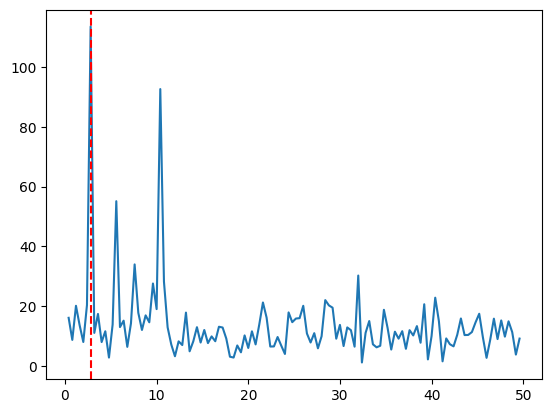

In [31]:
freq, power = compute_power_spectrum(t, signal)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

highest_frequency = df.sort_values(by='power', ascending=False).iloc[0]['frequency'] 

plt.plot(freq, power)
plt.axvline(highest_frequency, color='r', linestyle='--')

Use Pandas to identify frequency of oscillation with second highest power of `signal` and add a line at that frequency

Hint: Use .iloc[1] from previous example

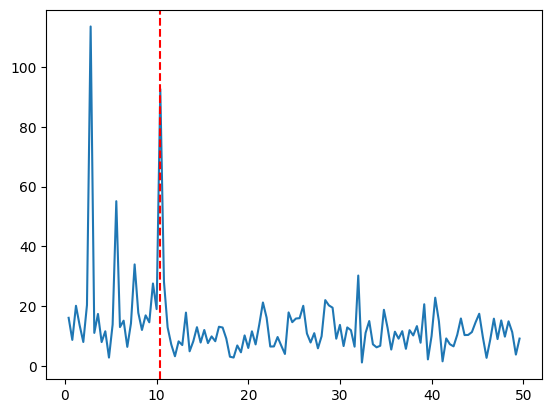

In [32]:
freq, power = compute_power_spectrum(t, signal)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

highest_frequency = df.sort_values(by='power', ascending=False).iloc[1]['frequency'] 

plt.plot(freq, power)
plt.axvline(highest_frequency, color='r', linestyle='--')

Use Pandas to identify frequency of oscillation with second highest power of `signal` and add a line at that frequency

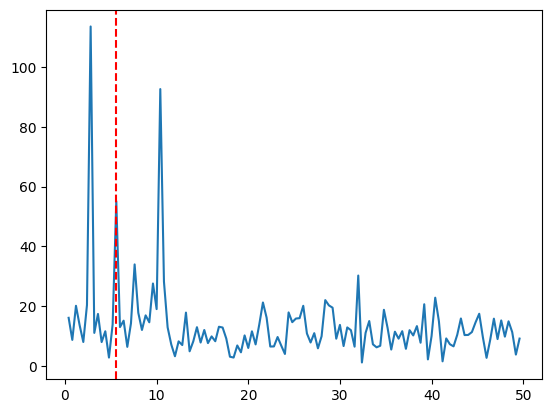

In [33]:
freq, power = compute_power_spectrum(t, signal)
df = pd.DataFrame({
    'frequency': freq,
    'power': power
    })

highest_frequency = df.sort_values(by='power', ascending=False).iloc[2]['frequency'] 

plt.plot(freq, power)
plt.axvline(highest_frequency, color='r', linestyle='--')

What do you think is good about this way of identifying frequencies of oscillation? What are its limitations?

## Power Spectrum Of Real Data

**Analysis Goals**
Now that we are familiar with the theory of power spectrum and frequency analysis, we shall start working with real data. In this section, we will
- Plot and compare power spectrum of trial-LFP data of different brain areas
- Plot and compare power spectrum of trial-avereaged LFP data of different brain areas


**Learning Goals**
- Using Pandas columns with custom functions
- Pandas groupby


| Code                                          | Description                                                                |
| --------------------------------------------- | -------------------------------------------------------------------------- |
| `dset = xr.load_dataset('data/steinmetz_20117-12-06_Lederberg.nc')` | Load the dataset from the file 'steinmetz_20117-12-06_Lederberg.nc' using xarray (assuming "xr" is the xarray module). |
| `dset['column'].to_dataframe().reset_index()` | Extract the 'column' data from the xarray dataset, convert it to a Pandas DataFrame, and reset the index. |
| `df[(df['col1'] == val1) & (df['col2'] == val2)]` | Filter rows from the DataFrame 'df' where 'col1' values equal 'val1' and 'col2' values equal 'val2'. |
| `df['col1'].values` | Extract the values from 'col1' in the DataFrame 'df' without indices, returning them as a NumPy array. |
| `plt.plot(x, y)` | Plot values in the 'y' array against the corresponding 'x' values. |

In [34]:
dset = xr.load_dataset('data/steinmetz_2017-12-06_Lederberg.nc')

Make lfp dataframe from dset and reset index

In [35]:
lfp = dset['lfp'].to_dataframe().reset_index()

**Example** Create power spectrum of LFP measurements from trail 1 of VISam brain area. What does it say?

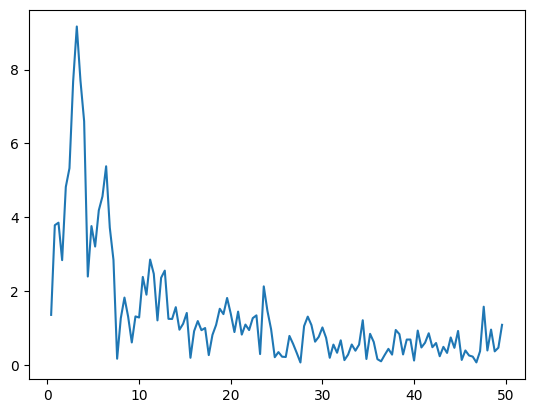

In [36]:
df = lfp[(lfp['brain_area_lfp'] == 'VISam') & (lfp['trial'] == 1)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Create power spectrum of LFP measurements from trail 5 of VISam brain area. How does this compare with the previous figure?

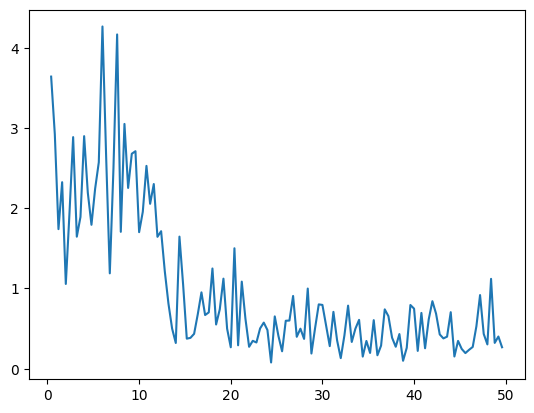

In [37]:
df = lfp[(lfp['brain_area_lfp'] == 'VISam') & (lfp['trial'] == 5)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Create power spectrum of LFP measurements from trail 1 of ACA brain area. How does this compare with the previous figure?

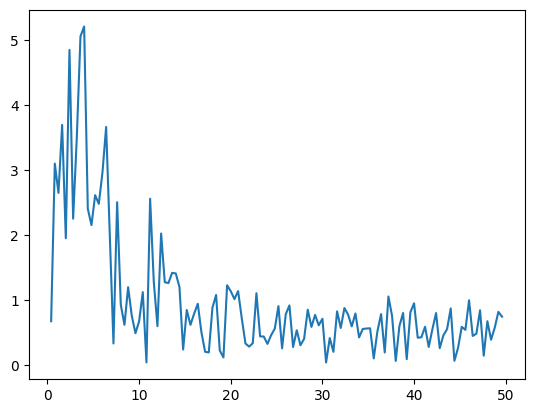

In [38]:
df = lfp[(lfp['brain_area_lfp'] == 'ACA') & (lfp['trial'] == 1)]
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

**Example** Compute power spectrum of mean LFP in VISam by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

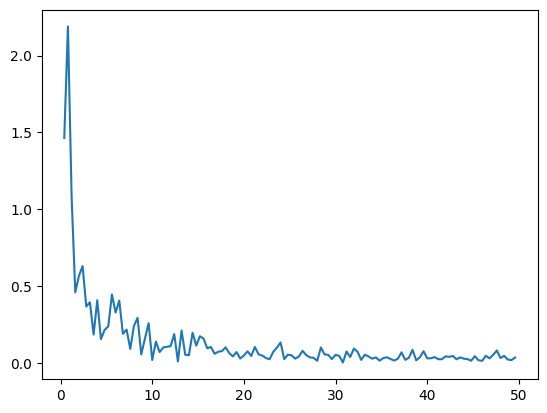

In [39]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'VISam']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in ZI by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

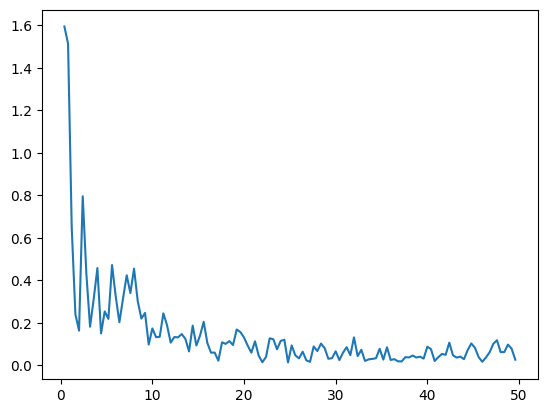

In [40]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'ZI']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in ACA by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

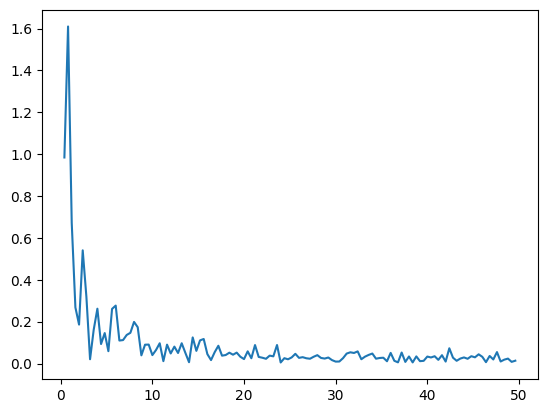

In [41]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'ACA']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Compute power spectrum of mean LFP in LGd by grouping lfp by the columns "brain_area_lfp" and "time," calculating the mean of the "lfp" values within each group

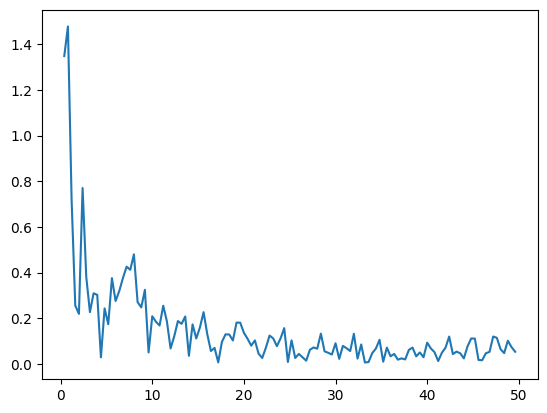

In [42]:
grouped = lfp.groupby(by=['brain_area_lfp', 'time'])['lfp'].mean().reset_index()
df = grouped[grouped['brain_area_lfp'] == 'LGd']
freq, power = compute_power_spectrum(df['time'].values, df['lfp'].values)
plt.plot(freq, power)

Pick 5 more trials and brain areas that you want to explore and create power spectrum